## Feature Selection

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [14]:
df = pd.read_csv("TransformedData.csv", parse_dates=True)
df

,Longitude,Latitude,Area (m²),Width (m),Length (m),Legal Status,House Direction,Floors,Rooms,Toilets,...,Street Name_Đỗ Quang,Street Name_Đỗ Thúc Tịnh,Street Name_Đỗ Thế Chấp & Lê Thước,Street Name_Đỗ Đình Thiện,Street Name_đa mặn 2,Street Name_điện biên phủ,Street Name_đại la 4,Street Name_đảo nổi,Street Name_đồng bài 2,Street Name_đồng xoài
0,10.401867,4.001773,8.062258,2.236068,-0.623963,1,3.0,1.414214,1.818446,1.414214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.401884,4.001535,8.062258,2.236068,-0.789908,1,6.0,1.414214,1.818446,1.732051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.404109,4.005330,9.486833,2.236068,0.703605,1,3.0,2.236068,2.893444,2.645751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.399711,4.005830,8.660254,2.236068,-0.292071,4,7.0,1.000000,1.443635,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.400744,4.006028,8.944272,2.236068,0.537659,5,6.0,1.000000,0.881374,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,10.403609,4.008889,16.124515,2.236068,1.931604,1,2.0,1.732051,3.093102,2.645751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4623,10.402800,4.009179,15.165751,2.236068,1.035496,1,8.0,1.414214,2.094713,1.414214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4624,10.403823,4.008291,16.124515,2.236068,4.354414,1,6.0,1.414214,1.818446,1.732051,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4625,10.404143,4.006397,12.727922,2.236068,0.205767,1,3.0,2.645751,3.093102,2.645751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
features = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)", "House Direction", "Legal Status", "Floors", "Rooms", "Toilets"]
X = df[features]
y = df["Price"]

### Data Visualization

#### Relationship of Target Variable to Input Variables

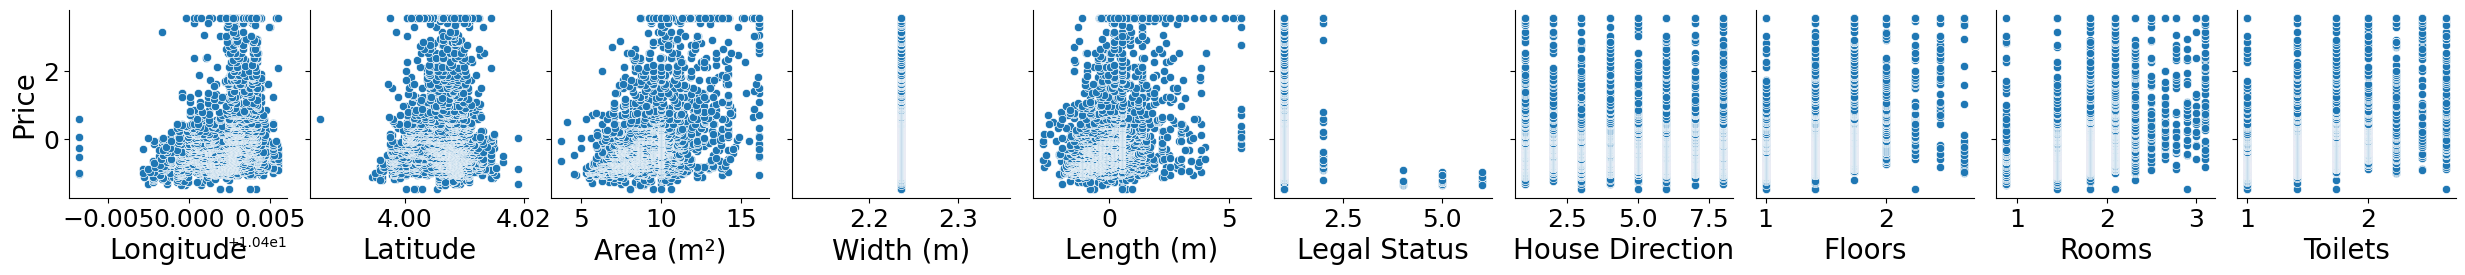

In [16]:
features = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)", "Legal Status", "House Direction", "Floors", "Rooms", "Toilets"]

pairplt_trans = sns.pairplot(df, x_vars=features, y_vars=["Price"])

for ax in pairplt_trans.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18) 

plt.show()

#### Comment
 - In the graph `Price & Area (m²)`, the points have a slight upward trend in distribution (positive correlation). 
 - The remaining features have a clear scatter distribution. 
 - There are some features that are concentrated at certain points
#### Conclusion
 - Weak correlation: Only `Price` and `Area (m²)` have a slight increasing trend, indicating that there may be a weak positive correlation.
 - Other variables have no clear correlation: `Longitude, Latitude, Width, Length` have no specific pattern, and are distributed quite randomly.
 - There are clusters of data at some points: Some variables have concentrated points, possibly because the data is limited to some ranges or is influenced by other factors such as location, property type.

#### Using HeatMap to Represent Correlation of Input Variable Pairs

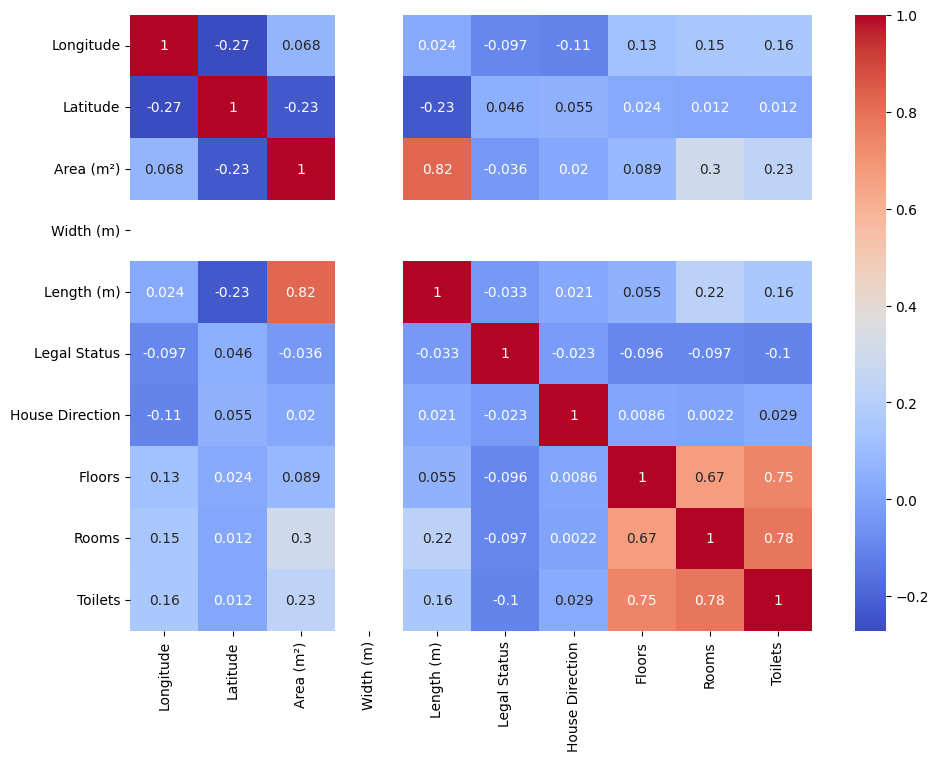

In [17]:
cols_to_include = ["Longitude", "Latitude", "Area (m²)", "Width (m)", "Length (m)", "Legal Status", "House Direction", "Floors", "Rooms", "Toilets"]
plt.figure(figsize=(11, 8))
sns.heatmap(df[cols_to_include].corr(), annot=True, cmap="coolwarm")

plt.show()

#### Using ScatterPlot to represent the relationship between 2 variables `Length (m)` and `Area (m²)`

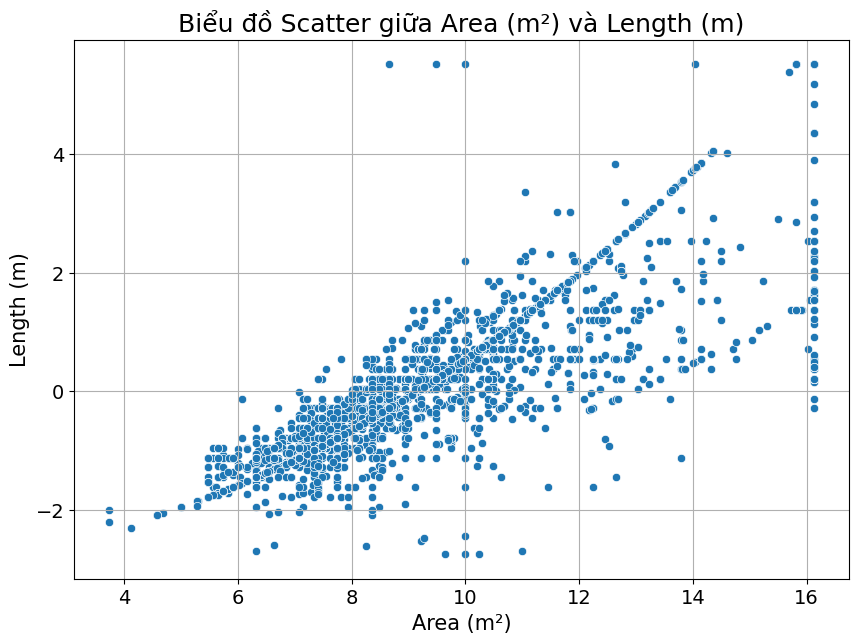

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Area (m²)', y='Length (m)', data=df)
plt.title('Biểu đồ Scatter giữa Area (m²) và Length (m)', fontsize=18)
plt.xlabel('Area (m²)', fontsize=15)
plt.ylabel('Length (m)', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

#### Comments
 - Based on the two graphs above, we see that the input variables are almost independent and do not depend on each other. Only the variables Length and Area have the most obvious correlation with each other (>0.8) according to Heatmap. 
 - At the same time, through ScatterPlot, the points tend to be distributed in an upward straight line (positive correlation).
#### Conclusion
It can be said that the higher the Length value, the larger the Area value and vice versa. 
In the future, one of these two variables can be eliminated to reduce overfitting of the model

### Statistical methods
#### Univariate feature selection

In [19]:
selector_best = SelectKBest(score_func=mutual_info_regression, k=12)
X_kbest = selector_best.fit_transform(X, y)
selected_features = X.columns[selector_best.get_support()]
scores = selector_best.scores_

sorted_indices = np.argsort(scores)[::-1]

print("Selected features in order from best to worst:")
for index in sorted_indices:
  print(f"{selected_features[index]}: {scores[index]}")

c:\Users\DUC VAN\miniconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=12 is greater than n_features=10. All the features will be returned.
  warnings.warn(


Selected features in order from best to worst:
Longitude: 0.9137615305034528
Latitude: 0.8785337332055247
Area (m²): 0.6941317711076058
Length (m): 0.43025978743650395
Rooms: 0.2723843079019024
Toilets: 0.2674083454843186
Floors: 0.24966870691852705
House Direction: 0.04445301001111934
Legal Status: 0.034218593138882536
Width (m): 0.0


##### Conclusion:
For statistical methods, by using the application of univariate statistical testing, it is possible to arrange the order of variables from most important to least important. The Longitude variable is considered the most important variable among the input variables.


### Recursive feature elimination
#### Recursive feature elimination with cross-validation

In [20]:
min_features_to_select = 1
regressor = LinearRegression()

cv = KFold(n_splits=5)

rfecv = RFECV(
    estimator=regressor,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")
selected_features = X.columns[rfecv.support_]
print("Selected features:", selected_features)

Optimal number of features: 6
Selected features: Index(['Longitude', 'Latitude', 'Area (m²)', 'Length (m)', 'Floors',
       'Toilets'],
      dtype='object')


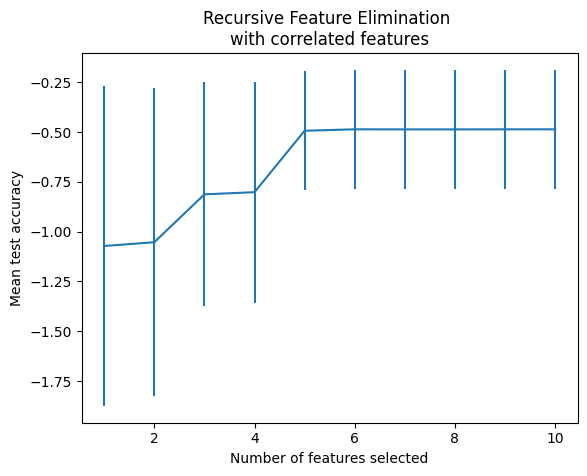

In [21]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

### Conclusion

#### Comments on the results

- Optimal number of features: 11. The results show that the model performs best when keeping all 11 features. That is, removing any of these 11 columns causes the model to degrade (higher MSE).

- Selected features: `Longitude`, `Latitude`, `Area (m²)`, `Length (m)`, `Land Type`, `House Direction`, `Floors`, `Rooms`, `Toilets`, `Category_Encoded`. These are the 11 selected features. If X initially has exactly these 11 columns, it proves that all are important for prediction. If X has more columns, then the results show that these 11 columns are the best according to the neg_mean_squared_error criterion.

#### From the graph

- The curve (mean_test_score) shows how the model improves or deteriorates when the number of features is gradually reduced.
- The error bars (yerr) show the variation over the cross-validation runs.

- The highest point of the curve corresponds to the selection of 11 features.

#### Conclusion
- The LinearRegression model with the above 11 features is the most optimal according to the MSE evaluation during the recursive feature elimination (RFECV) process.

- If your goal is to optimize the number of features (feature selection), the results show that keeping 11 features is the best performance.

- In case you expect to remove some features while maintaining the same performance, this result shows that the model probably needs all 11 columns to perform well.